
# 1 D heat equation

The heat equation is a parabolic partial diffrential equation. It is a certain kind of diffrential equation, which can be seen at a lot of places other than heat transfer. Like diffusion equation is identical to the heat equation. In quantum mechanics, the Schcrodiner equation has the same form as heat equation (but it involves complex varibles). That is, it's first order in time and second order in space. 

In one dimenssion, the heat equation is given by:

$$\frac{\partial u}{\partial t} = \kappa \frac{\partial^2 u}{\partial x^2}$$

Where $\kappa$ is called _thermal diffusivity_. It's a constant of the problem. And it's a charactristic of the materical. $u(x,t)$ is the temperature of the rod. 

When we solve this equation, we will need three condition, one because of first time derrivative, two for two space derrivative. We will need one _initial condition_ for time and two boundary conditions for space. 

### Clear statement of the problem:

>A rod of length $L$ with initially non-uniform temperature distribution, is placed in touch with a thermal reservoir by its end. That is both of it's end are fixed at $T=0$ and we wait for it to cool down. Our goal will be to find the value of temperature at any moment of time, at any position, that's to find the general expression for $u(x,t)$.

The equation that follows the 1D heat equation which is:

$$\frac{\partial u}{\partial t} = \kappa \frac{\partial^2 u}{\partial x^2}$$

And the intial are:

$$T(x,0) = \begin{cases}
			\frac{T_0 x}{L}, & \text{0<x<L/2}\\
            \frac{T_0 (L-x)}{L}, & \text{otherwise}
		 \end{cases}$$

The boundary conditions are 
$$T(0,t) = 0; T(L,t) = 0$$

To start solving this equation, we will first have to non-dimenssionalise it. Because computers don't understand the language of units. We need to find the natural length scale which can be easily identified as the length of the rod $L$. Now we define dimenssionless position as $x \to \frac{x}{L}$. Then we need to find the scale for time. If we put the length scale into the equation, we will find that the time scale is $\tau = \frac{L^2}{\kappa}$. Then we define $t \to \frac{t}{\tau}$. We also need to find a temperature scale, which doesn't effect our equation because it is on both side and will cancel out. But still we need to do that. The natural temperature scale is found in the intial  intial distribution of the temperature. Then this $T_0$ can we taken as temperature scale and the dimenssionless temperature would be $T \to T/T_0$. Not that our space domain reduces to just $[0,1]$ in dimenssionless variables. Now we easily write the diffrential equation in dimenssionless variables:

$$\frac{\partial u}{\partial t} = \frac{\partial^2 u}{\partial x^2}$$

To use the finite difference method, we will decretise the time range into the small steps of step size $dt$, and space into the step size of $dx$. We will also rename the variable as $u(j \times dx, i\times dt) = u_{ij}$. No we will take the finite difference definations of the derrivatives:

$$\frac{\partial u}{\partial t} = \frac{u_{i+1,j} - u_{i,j}}{dt}$$
$$\frac{\partial^2 u}{\partial x^2} = \frac{u_{i,j+1}+u_{i,j-1}-2u_{i,j}}{dx^2}$$

Now the heat equation can be written as:

$$ \frac{u_{i+1,j} - u_{i,j}}{dt} = \frac{u_{i,j+1}+u_{i,j-1}-2u_{i,j}}{dx^2}$$

which is 
$$u_{i,j+1} =  \lambda u_{i+1, j} + \lambda u_{i-1, j} - (2\lambda + 1) u_{i,j}$$

where $\lambda = \frac{dt}{dx^2}$. There the index goes $0<i<N_t$, and $1<j<N_x$. $N_t$ is total number of time steps, $N_x$ is total number of space steps. Not that $u$ at every time step can be determined from the $u$ at the previous time step, at every postion. But we need to start from somewhere, and the boundary and intial conditions helps to achieve that. We will iterate over time, calculating the tmeperature at every postion from the previous time step and hence we will solve this diffrential equation. The code for that scheme is given below. 

__Physical intuation from the answer__: As the end are fixed at 0 temperature. The rod will cool down to $0$ and long time. So we expect: $u \to 0$ as $t \to \infty$.

This is nice to have a physial intuation before to start to solve the equation so that we can confirm the solution after we solve it neumerically.

.

.

.

.

.


In [65]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.animation import FuncAnimation as animate
from tqdm import tqdm
%matplotlib qt

In [66]:
dx = 0.03 #time and space step size
dt = 0.00025

l = dt/(dx**2)

print(l)

xs = np.arange(0,1,dx) #space desretisation
ts = np.arange(0,1+dt,dt) #time descretisation

Nx = len(xs)
Nt =  len(ts) #total number of grid points in time and space

U = np.zeros((Nt, Nx), dtype='float64') #empty matrix

#setting up boundary condtion 

def f(x): #at t=0, u=f(x)
    # return np.sin(np.pi*x) 
    return x if x<0.5 else (1-1*x)

U[:, 0] = 0
U[:,-1] = 0

#setting up the initial condtion
for i in range(Nx):
    U[0, i] = f(i*dx)

0.2777777777777778


In [67]:
#implimenting the actual algorithm

for i in range(1, Nt):
    for j in range(0, Nx-1):
        U[i, j] = l*(U[i-1, j+1]+ U[i-1, j-1]) + (1-2*l)*U[i-1,j]

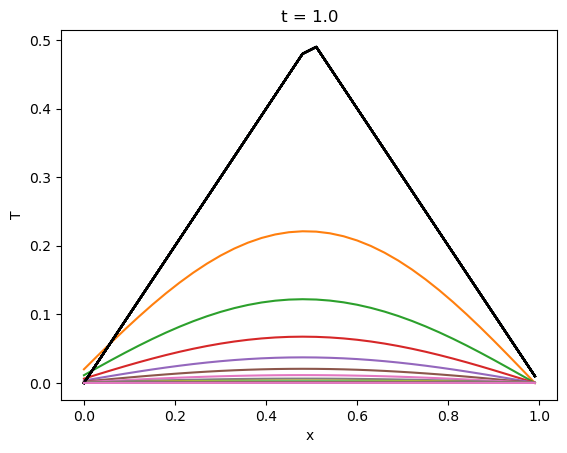

In [68]:
%matplotlib inline
for i in range(Nt):
    if i%250==0:
        # plt.clf()
        plt.plot(xs, U[0, :], color='black')
        plt.plot(xs, U[i, :])
        plt.title(f't = {round(i*dt, 3)}')
        plt.xlabel('x')
        plt.ylabel("T")
        # plt.pause(0.1)

In [69]:
#animating the results
%matplotlib qt
for i in range(Nt):
    if i%100==0:
        plt.clf()
        plt.plot(xs, U[0, :], color='black')
        plt.plot(xs, U[i, :])
        plt.title(f't = {round(i*dt, 3)}')
        plt.xlabel('x')
        plt.ylabel("T")
        plt.pause(0.1)

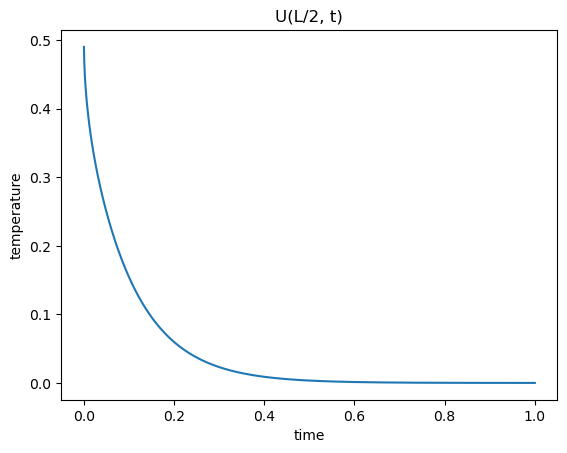

In [70]:
%matplotlib inline
plt.plot(ts, U[:, len(xs)//2])
plt.xlabel('time')
plt.ylabel('temperature')
plt.title('U(L/2, t)')
plt.show()

It does, as we expected the temperature goes to zero at any random point as time progresses. That can also be seen from the animation. 

### Trunckation Error, Convergance and stability issues

Finite differece method is not a good method to solve partial diffrential equation. It is only valid for certain boundary conditions, and it has severe issues with convergance and stability. First of all, I want to comment on the truncation error. In time We are taking it to the first order. The taylor series expension for that would be:

$$u(x, t+\Delta t) = u(x,t)+(\Delta t)u_t + (\Delta t)^2 \frac{1}{2}u_{tt}$$
We can do the same think for $x$ and find the error to be equal to 
$$\epsilon = (\Delta t)u_{tt}(x, \eta) + (\Delta x^2)u_{xxxx}(\xi, t)$$
where $t<\eta<t+\Delta t$ and $x-\Delta x<\xi<x+\Delta x$. In our case the error is $\mathcal{O(\Delta t)}$ and the space error is + $\mathcal{O(\Delta x^2)}$.

The model has sever convergance issues. It turns out that the solutions will only be stable if the ratio:

$$\frac{\Delta t}{\Delta x^2}\le \frac{1}{2}$$

If we take more than that, we would get unstable solution and sometimes the solution will diverge as $T\to\infty$. One example is if we take $\Delta t = \Delta x$ we get ugle solutions. The temperature is shown to go in negavtive. 


.

.

.

.



In [71]:
dx = 0.01 #time and space step size
dt = 0.01
k = 1

l = k*dt/(dx**2)

print(l)

xs = np.arange(0,1+dx,dx) #space desretisation
ts = np.arange(0,1+dt,dt) #time descretisation

Nx = len(xs)
Nt =  len(ts) #total number of grid points in time and space

U = np.zeros((Nt, Nx), dtype='float64') #empty matrix

#setting up boundary condtion 

def f(x): #at t=0, u=f(x)
    # return np.sin(np.pi*x) 
    return 0

U[:, 0] = 0
U[:,-1] = 1

#setting up the initial condtion
for i in range(Nx):
    U[0, i] = f(i*dx)


#implimenting the actual algorithm

for i in range(1, Nt):
    for j in range(1, Nx-1):
        U[i, j] = l*(U[i-1, j+1]+ U[i-1, j-1]) + (1-2*l)*U[i-1,j]

100.0


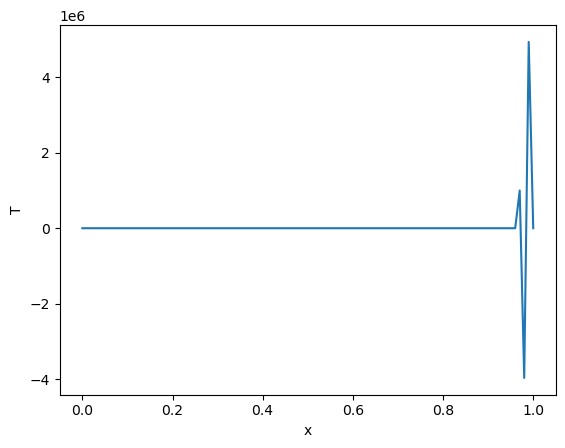

In [72]:
%matplotlib inline
plt.plot(xs, U[4,:])
plt.xlabel('x')
plt.ylabel("T")
plt.show()

AS you can see the solution is diverging. And aslo it show temperature going to negave which doesn't make sense. So We need to choose the time step carefully. 

# Heat equation in 2D

## Clear statement of the problem:

>A square plate with non-unifrom temperatue distribution intially is set to cool down with it's edges fixed at temperature zero.

The heat equation in 2D is:

$$\frac{\partial u}{\partial t} = \frac{\partial^2 u}{\partial x^2} + \frac{\partial u}{\partial y^2}$$

The boundary conditions are:

$$u(x,y,0) = T_0(2 \sin^2(3 \pi x/L) + 3 \cos^2(3 \pi x/L))$$

$$T(0,y,t) = T(L, y, t) = T(x,0,t) = T(x, L, t) = 0$$

The meaning of the boundary condition is that, the plate was hot, and we somehow (not thouching it with hands), brought it in contact with a thermal reservoir ( a big bowl of rice) (ice sorry) to cool it down. And now we want to study how it cools down. That animation when the plates cool is cool.

This can be descretise into the finite difference equation as:

$$\frac{u_{i+1,j, k} - u_{i,j, k}}{dt} = \frac{u_{i,j+1, k}+u_{i,j-1, k}-2u_{i,j, k}}{dx^2} + \frac{u_{i,j, k+1}+u_{i,j, k-1}-2u_{i,j,k}}{dy^2}$$

$$u_{i+1, j, k} = \lambda_x(u_{i,j+1,k} + u_{i,j-1,k}) +  \lambda_y(u_{i,j,k+1} + u_{i,j,k-1}) + 2(1-2\lambda_x-2\lambda_y)u_{i,j,k}$$

Where $\lambda_x = \frac{dt}{dx^2}$ and  $\lambda_y = \frac{dt}{dy^2}$. We impliment the same algo are before. And our expectations from the solution is also the same. That is:__Physical intuation from the answer__: As the end are fixed at 0 temperature. The rod will cool down to $0$ and long time. So we expect: $u \to 0$ as $t \to \infty$.


In [73]:
dx = 0.02 #time and space step size
dy = 0.02
k = 1

dt = k*(dx*dy)/4

lx = dt/(dx**2)
ly = dt/(dy**2)

print(lx*ly)

xs = np.arange(0,1,dx) #space desretisation
ys = np.arange(0,1.5,dy) #space desretisation
ts = np.arange(0,0.3+dt,dt) #time descretisation

Nx = len(xs)
Nt =  len(ts) #total number of grid points in time and space
Ny = len(ys)

U = np.zeros((Nt, Nx, Ny), dtype='float64') #empty matrix

#setting up boundary condtion 

def f(x, y): #at t=0, u=f(x)
    # return np.sin(np.pi*x) 
    # return x if x<0.5 else (1-1*x)
    # return np.exp(-(x-xs[len(xs)//2])**2-(y-ys[len(ys)//2])**2)
    return 2*np.sin(x*np.pi*3)**2 + 3*np.cos(y*np.pi*3)**2

#setting the boundaries
U[:, 0, :] = 0
U[:,-1, :] = 0
U[:,:, 0] = 0
U[:,:, -1] = 0

#setting up the initial condtion
for i in range(Nx):
    for j in range(Ny):
        U[0, i, j] = f(i*dx, j*dy)

0.0625


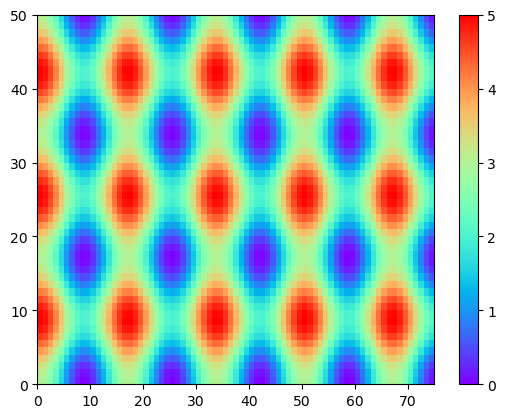

In [74]:
%matplotlib inline
plt.pcolormesh(U[0,:,:],cmap=plt.colormaps['rainbow'])
plt.colorbar()

In [75]:
#implimenting the algorithm
for i in tqdm(range(1, Nt)):
    for j in range(1, Nx-1):
        for k in range(1, Ny-1):
            U[i,j,k] = lx*(U[i-1,j+1,k]+U[i-1,j-1,k]) + ly*(U[i-1,j,k+1]+ U[i-1,j,k-1]) +(1-2*lx-2*ly)*U[i-1,j,k]

100%|██████████| 3000/3000 [00:12<00:00, 233.32it/s]


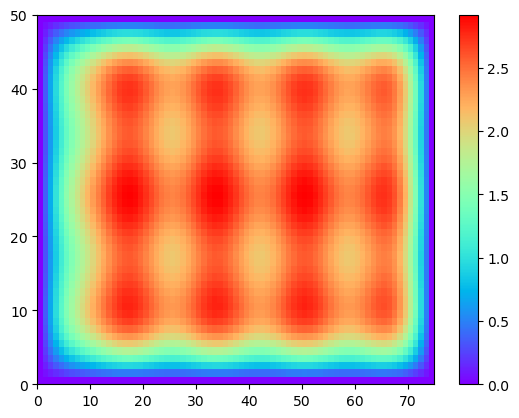

In [76]:
%matplotlib inline
plt.pcolormesh(U[50,:,:], cmap=plt.colormaps['rainbow'])
plt.colorbar()

In [77]:
#animating the cooling down process
%matplotlib qt
for i in range(Nt):
    if i%100==0:
        plt.clf()
        # plt.plot(xs, U[0, :, ], color='black')
        plt.pcolormesh(U[i, :, :], vmin=0, vmax=4, cmap=plt.colormaps['rainbow'])
        plt.colorbar()
        plt.title(f't = {round(i*dt, 3)}')
        plt.xlabel('x')
        plt.ylabel("T")
        plt.pause(0.5)

8


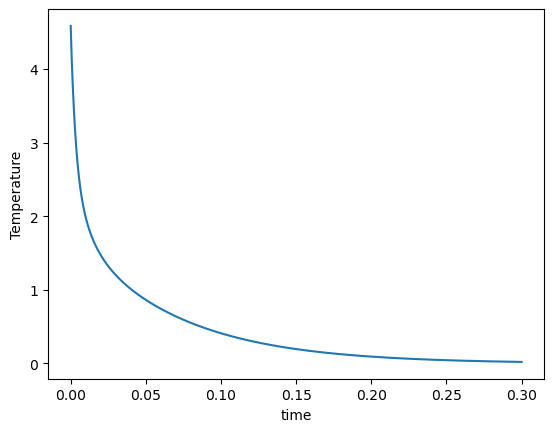

In [83]:
#seeing the temperature of a random point with time
%matplotlib inline
x = int(np.random.uniform(0, Nx))
y = int(np.random.uniform(0, Ny))
print(x)

plt.plot(ts, U[:,x, y])
plt.xlabel('time')
plt.ylabel('Temperature')
plt.show()

As we can see the temperature ultimately goes to zero. Which means that it goes hand in hand with out expections.

## With arbitarory boundary condition

Every thing is same as before but a 2-D heart shaped matel is set to cool down with it's edges at zero temperature. 

In [84]:
#defining the curve in 2d
def y1(x):
    return 1+((x-1)**2)**(1/3)-np.sqrt(1-(x-1)**2)

def y2(x):
    return 1+((x-1)**2)**(1/3)+np.sqrt(1-(x-1)**2)

#checking if any ranodm point lies inside the boundary
def is_in(x,y):
    return y>y1(x) and y<y2(x)

In [85]:
dx = 0.02
xs = np.arange(0,2+dx,dx)

(0.0, 2.0)

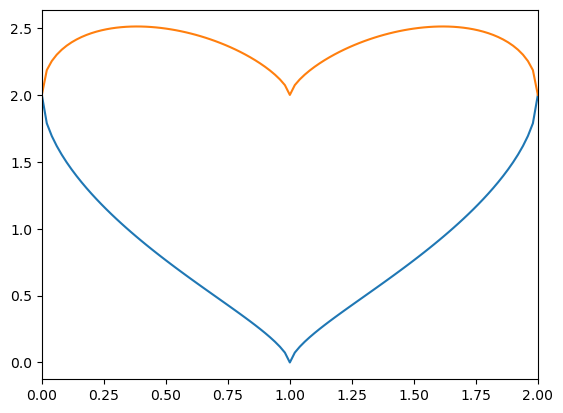

In [86]:
%matplotlib inline
plt.plot(xs,y1(xs))
plt.plot(xs,y2(xs))
plt.xlim(0,2)

In [96]:
dx = 0.02 #time and space step size
dy = 0.02

dt = (dx*dy)/4

lx = dt/(dx**2)
ly = dt/(dy**2)

print(lx*ly)

xs = np.arange(0,2+dx,dx)
ys = np.arange(0,2.5,dy) #space desretisation
ts = np.arange(0,0.3+dt,dt) #time descretisation

Nx = len(xs)
Nt =  len(ts) #total number of grid points in time and space
Ny = len(ys)

U = np.zeros((Nt, Nx, Ny), dtype='float64') #empty matrix

#setting up boundary condtion 

def f(x, y): #at t=0, u=f(x)
    # return np.sin(np.pi*x) 
    # return x if x<0.5 else (1-1*x)
    # return np.exp(-(x-xs[len(xs)//2])**2-(y-ys[len(ys)//2])**2)
    return 2*np.sin(x*np.pi)**2 + 3*np.cos(y*np.pi)**2

# setting the boundaries
# U[:, 0, :] = 1
# U[:,-1, :] = 1
# U[:,:, 0] = 0
# U[:,:, -1] = 0
# for i in range(Nx):
#     for j in range(Ny):
#         if is_in(i*dx, j*dy):
#             U[:, i, j] = 1
#         else:
#             U[:, i,j] = 100

#setting up the initial condtion
for i in range(Nx):
    for j in range(Ny):
        if is_in(i*dx, j*dy):
            U[0, i, j] = f(i*dx, j*dy)
        else:
            continue

0.0625


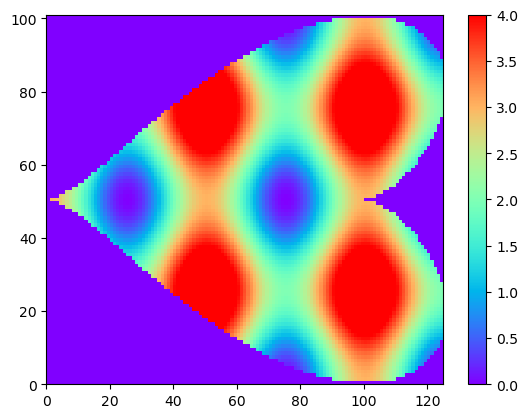

In [97]:
%matplotlib inline
plt.pcolormesh(U[0,:,:], vmin=0, vmax=4, cmap=plt.colormaps['rainbow'])
plt.colorbar()
plt.show()

This looks more like a leaf than a heart. It's a leaf when the plant has some kind of disease. And we know that human heart is not of that shape. Its shape is very complicated. So now on our problem is 

A leaf shaped plate with a non-uniform temeprature distribution is brought into contact with a thermal reservoir along its edges to cool down. We want to study the temperature as a function of position and time. 

In [98]:
#implimenting the algo
for i in tqdm(range(1, Nt)):
    for j in range(1, Nx-2):
        for k in range(1, Ny-2):
            if is_in((j-1)*dx, (k-1)*dy):
                U[i,j,k] = lx*(U[i-1,j+1,k]+U[i-1,j-1,k]) + ly*(U[i-1,j,k+1]+ U[i-1,j,k-1]) +(1-2*lx-2*ly)*U[i-1,j,k]
            else:
                continue

100%|██████████| 3000/3000 [01:32<00:00, 32.44it/s]


In [99]:
#animating the results. 
%matplotlib qt
for i in range(Nt):
    if i%20==0:
        plt.clf()
        # plt.plot(xs, U[0, :, ], color='black')
        plt.pcolormesh(U[i, :, :],vmin=0, vmax=4, cmap=plt.colormaps['rainbow'])
        plt.colorbar()
        plt.title(f't = {round(i*dt, 3)}')
        plt.xlabel('x')
        plt.ylabel("T")
        plt.pause(0.01)

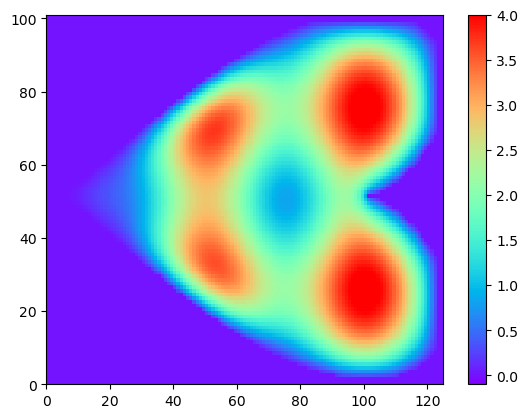

In [100]:
%matplotlib inline
plt.pcolormesh(U[100,:,:], vmax=-0, vmin=4,cmap=plt.colormaps['rainbow'])
plt.colorbar()
plt.show()

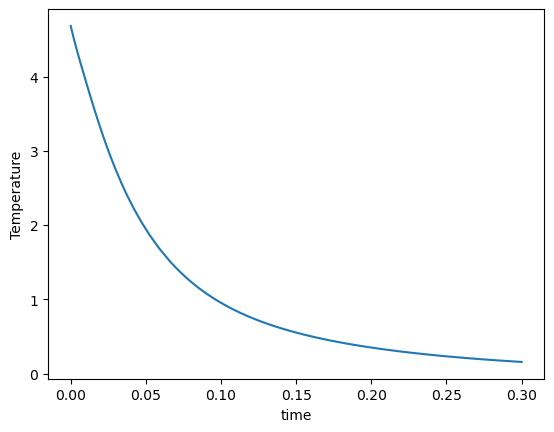

In [101]:
#seeing the temperature of a random point with time
%matplotlib inline
while True:
    x = int(np.random.uniform(0, Nx))
    y = int(np.random.uniform(0, Ny))

    if is_in(x*dx,y*dy):

        plt.plot(ts, U[:,x, y])
        plt.xlabel('time')
        plt.ylabel('Temperature')
        break;

That also confirms that our solution is absolutely right. 